In [39]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
sns.set_palette('pastel')

# 열 내용이 무한 길이로 출력되도록 설정
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)  # 모든 열 출력
pd.set_option('display.max_rows', None)     # 모든 행 출력
# 지수 표기 없이 전체 숫자 보이게 설정
pd.set_option('display.float_format', '{:,.0f}'.format)


## 데이터 구조
1. summary_df – 상권 요약 정보

| 컬럼명              | 설명                     | 예시 값                |
| ---------------- | ---------------------- | ------------------- |
| `timestamp`      | 데이터 수집 시각 (`datetime`) | 2025-06-02 16:48:02 |
| `area_name`      | 지역명 (핫스팟 이름)           | 강남 MICE 관광특구        |
| `activity_level` | 상권 활성도 (ex: 한산한, 보통 등) | 보통                  |
| `payment_count`  | 전체 결제 건수 (문자형 숫자)      | 28                  |
| `min_amount`     | 최소 결제 금액 (`int`)       | 500000              |
| `max_amount`     | 최대 결제 금액 (`int`)       | 550000              |

2. categories_df – 업종별 상세 소비 정보

| 컬럼명             | 설명                      | 예시 값                |
| --------------- | ----------------------- | ------------------- |
| `area_name`     | 지역명 (핫스팟 이름)            | 강남 MICE 관광특구        |
| `category`      | 업종 중분류                  | 제과/커피/패스트푸드         |
| `level`         | 업종별 활성도 (ex: 보통, 한산한 등) | 보통                  |
| `payment_count` | 업종별 결제 건수 (`int`)       | 8                   |
| `amount_min`    | 업종별 최소 결제 금액 (`int`)    | 100000              |
| `amount_max`    | 업종별 최대 결제 금액 (`int`)    | 150000              |
| `stores`        | 해당 업종 점포 수 (`int`)      | 28                  |
| `timestamp`     | 집계 기준 월 (`str`, YYYYMM) | 202504              |

3. parking_df - 시영주차장 실시간 주차대수 

| 컬럼명                       | 설명                                  | 예시                    |
| ------------------------- | ----------------------------------- | --------------------- |
| `PKLT_CD`                 | 주차장 고유 코드                           | `171721`              |
| `PKLT_NM`                 | 주차장명                                | `세종로 공영주차장(시)`        |
| `ADDR`                    | 주소 (구 포함 전체 주소)                     | `종로구 세종로 80-1`        |
| `PKLT_TYPE`               | 주차장 종류 코드 (`NS`: 노상, `NW`: 노외 등)    | `NW`                  |
| `PRK_TYPE_NM`             | 주차장 종류명                             | `노외 주차장`              |
| `OPER_SE`                 | 운영 구분 코드                            | `1`                   |
| `OPER_SE_NM`              | 운영 구분명 (시간제 주차장, 거주자 우선 등)          | `시간제 주차장`             |
| `TELNO`                   | 전화번호                                | `02-2290-6566`        |
| `PRK_STTS_YN`             | 실시간 주차 현황 제공 여부 (`1`: 제공, `0`: 미제공) | `1`                   |
| `PRK_STTS_NM`             | 실시간 정보 상태 메시지                       | `현재~20분이내 연계데이터 존재`   |
| `TPKCT`                   | 총 주차 가능 면수                          | `1260.0`              |
| `NOW_PRK_VHCL_CNT`        | 현재 주차 차량 수 (실시간)                    | `619.0`               |
| `NOW_PRK_VHCL_UPDT_TM`    | 실시간 정보 업데이트 시간                      | `2025-06-02 16:56:30` |
| `PAY_YN`                  | 유료 여부 (`Y`/`N`)                     | `Y`                   |
| `PAY_YN_NM`               | 유료 여부 설명                            | `유료`                  |
| `NGHT_PAY_YN`             | 야간 무료 개방 여부 (`Y`/`N`)               | `N`                   |
| `NGHT_PAY_YN_NM`          | 야간 무료 개방 여부 설명                      | `야간 미개방`              |
| `WD_OPER_BGNG_TM`         | 평일 운영 시작 시각 (HHMM)                  | `0000`                |
| `WD_OPER_END_TM`          | 평일 운영 종료 시각 (HHMM)                  | `2400`                |
| `WE_OPER_BGNG_TM`         | 주말 운영 시작 시각 (HHMM)                  | `0000`                |
| `WE_OPER_END_TM`          | 주말 운영 종료 시각 (HHMM)                  | `2400`                |
| `LHLDY_OPER_BGNG_TM`      | 공휴일 운영 시작 시각 (HHMM)                 | `0000`                |
| `LHLDY_OPER_END_TM`       | 공휴일 운영 종료 시각 (HHMM)                 | `2400`                |
| `SAT_CHGD_FREE_SE`        | 토요일 유무료 여부 코드 (`Y`/`N`)             | `N`                   |
| `SAT_CHGD_FREE_NM`        | 토요일 유무료 여부 설명                       | `무료`                  |
| `LHLDY_CHGD_FREE_SE`      | 공휴일 유무료 여부 코드 (`Y`/`N`)             | `N`                   |
| `LHLDY_CHGD_FREE_SE_NAME` | 공휴일 유무료 여부 설명                       | `무료`                  |
| `PRD_AMT`                 | 월 정기권 금액 (원)                        | `176000`              |
| `STRT_PKLT_MNG_NO`        | 노상 주차장 관리 그룹 번호                     | (빈 값 가능)              |
| `BSC_PRK_CRG`             | 기본 주차 요금 (원)                        | `430.0`               |
| `BSC_PRK_HR`              | 기본 주차 시간 (분)                        | `5.0`                 |
| `ADD_PRK_CRG`             | 추가 단위 요금 (원)                        | `430.0`               |
| `ADD_PRK_HR`              | 추가 단위 시간 (분)                        | `5.0`                 |
| `BUS_BSC_PRK_CRG`         | 버스 기본 주차 요금 (원)                     | `0.0`                 |
| `BUS_BSC_PRK_HR`          | 버스 기본 주차 시간 (분)                     | `0.0`                 |
| `BUS_ADD_PRK_HR`          | 버스 추가 단위 시간 (분)                     | `0.0`                 |
| `BUS_ADD_PRK_CRG`         | 버스 추가 단위 요금 (원)                     | `0.0`                 |
| `DAY_MAX_CRG`             | 일일 최대 요금 (원)                        | `30900.0`             |
| `SHRN_PKLT_MNG_NM`        | 공유 주차장 관리업체명                        | `*` 또는 빈 값            |
| `SHRN_PKLT_MNG_URL`       | 공유 주차장 관리업체 링크                      | `*` 또는 빈 값            |
| `SHRN_PKLT_YN`            | 공유 주차장 여부 (`Y`: 공유, `N`: 비공유)       | `N`                   |
| `SHRN_PKLT_ETC`           | 공유 주차장 기타 설명                        | `*` 또는 빈 값            |



In [2]:
parking_df = pd.read_csv("../data/seoul_public_parking.csv")
parking_df.head()

,PKLT_CD,PKLT_NM,ADDR,PKLT_TYPE,PRK_TYPE_NM,OPER_SE,OPER_SE_NM,TELNO,PRK_STTS_YN,PRK_STTS_NM,TPKCT,NOW_PRK_VHCL_CNT,NOW_PRK_VHCL_UPDT_TM,PAY_YN,PAY_YN_NM,NGHT_PAY_YN,NGHT_PAY_YN_NM,WD_OPER_BGNG_TM,WD_OPER_END_TM,WE_OPER_BGNG_TM,WE_OPER_END_TM,LHLDY_OPER_BGNG_TM,LHLDY_OPER_END_TM,SAT_CHGD_FREE_SE,SAT_CHGD_FREE_NM,LHLDY_CHGD_FREE_SE,LHLDY_CHGD_FREE_SE_NAME,PRD_AMT,STRT_PKLT_MNG_NO,BSC_PRK_CRG,BSC_PRK_HR,ADD_PRK_CRG,ADD_PRK_HR,BUS_BSC_PRK_CRG,BUS_BSC_PRK_HR,BUS_ADD_PRK_HR,BUS_ADD_PRK_CRG,DAY_MAX_CRG,SHRN_PKLT_MNG_NM,SHRN_PKLT_MNG_URL,SHRN_PKLT_YN,SHRN_PKLT_ETC
0,171721,세종로 공영주차장(시),종로구 세종로 80-1,NW,노외 주차장,1,시간제 주차장,02-2290-6566,1,현재~20분이내 연계데이터 존재(현재 주차대수 표현),1260.0,619.0,2025-06-02 16:56:30,Y,유료,N,야간 미개방,0,2400,0,2400,0,2400,N,무료,N,무료,176000.0,NaN,430.0,5.0,430.0,5.0,0.0,0.0,0.0,0.0,30900.0,*,*,N,*
1,171730,종묘주차장 공영주차장(시),종로구 훈정동 2-0,NW,노외 주차장,1,시간제 주차장,02-2290-6166,1,현재~20분이내 연계데이터 존재(현재 주차대수 표현),1317.0,1194.0,2025-06-02 16:56:30,Y,유료,N,야간 미개방,0,2400,0,2400,0,2400,N,무료,N,무료,175000.0,NaN,400.0,5.0,400.0,5.0,0.0,0.0,0.0,0.0,28800.0,*,*,N,*
2,171900,훈련원공원 공영주차장(시),중구 을지로5가 40-3,NW,노외 주차장,1,시간제 주차장,02-3405-4597,1,현재~20분이내 연계데이터 존재(현재 주차대수 표현),873.0,631.0,2025-06-02 16:56:30,Y,유료,N,야간 미개방,0,2400,0,2400,0,2400,N,무료,N,무료,176000.0,NaN,550.0,5.0,550.0,5.0,0.0,0.0,0.0,0.0,39600.0,*,*,N,*
3,172051,한강진역 공영주차장(시),용산구 한남동 728-27,NW,노외 주차장,1,시간제 주차장,02-795-6406,1,현재~20분이내 연계데이터 존재(현재 주차대수 표현),174.0,122.0,2025-06-02 16:56:30,Y,유료,N,야간 미개방,0,2400,0,2400,0,2400,N,무료,N,무료,168000.0,NaN,400.0,5.0,400.0,5.0,0.0,0.0,0.0,0.0,28800.0,*,*,N,*
4,172065,용산주차빌딩 공영주차장(시),용산구 한강로2가 12-9,NW,노외 주차장,1,시간제 주차장,02-2290-6014,1,현재~20분이내 연계데이터 존재(현재 주차대수 표현),561.0,292.0,2025-06-02 16:56:30,Y,유료,N,야간 미개방,0,2400,0,2400,0,2400,N,무료,N,무료,168000.0,NaN,300.0,5.0,300.0,5.0,0.0,0.0,0.0,0.0,21600.0,*,*,N,*


In [11]:
commercial_df = pd.read_json("../data/commercial_data.jsonl", lines=True)
commercial_df.head()

,timestamp,area_name,commercial
0,2025-06-02 16:48:02.893073,강남 MICE 관광특구,"{'summary': {'activity_level': '보통', 'payment_count': '28', 'min_amount': 500000, 'max_amount': 550000}, 'categories': [{'category': '제과/커피/패스트푸드', 'level': '보통', 'payment_count': 8, 'amount_min': 100000, 'amount_max': 150000, 'stores': 28, 'timestamp': '202504'}, {'category': '기타요식', 'level': '보통', 'payment_count': 5, 'amount_min': 100000, 'amount_max': 150000, 'stores': 32, 'timestamp': '202504'}, {'category': '할인점/슈퍼마켓', 'level': '분주한', 'payment_count': 4, 'amount_min': 200000, 'amount_max': 250000, 'stores': 7, 'timestamp': '202504'}, {'category': '편의점', 'level': '보통', 'payment_count': 11, 'amount_min': 60000, 'amount_max': 70000, 'stores': 16, 'timestamp': '202504'}]}"
1,2025-06-02 16:48:04.430161,동대문 관광특구,"{'summary': {'activity_level': '보통', 'payment_count': '36', 'min_amount': 450000, 'max_amount': 500000}, 'categories': [{'category': '제과/커피/패스트푸드', 'level': '분주한', 'payment_count': 9, 'amount_min': 100000, 'amount_max': 150000, 'stores': 50, 'timestamp': '202504'}, {'category': '기타요식', 'level': '한산한', 'payment_count': 8, 'amount_min': 100000, 'amount_max': 150000, 'stores': 153, 'timestamp': '202504'}, {'category': '할인점/슈퍼마켓', 'level': '한산한', 'payment_count': 5, 'amount_min': 80000, 'amount_max': 90000, 'stores': 52, 'timestamp': '202504'}, {'category': '편의점', 'level': '한산한', 'payment_count': 10, 'amount_min': 30000, 'amount_max': 40000, 'stores': 35, 'timestamp': '202504'}, {'category': '병원', 'level': '한산한', 'payment_count': 4, 'amount_min': 90000, 'amount_max': 100000, 'stores': 35, 'timestamp': '202504'}]}"
2,2025-06-02 16:48:07.759468,명동 관광특구,"{'summary': {'activity_level': '보통', 'payment_count': '554', 'min_amount': 7500000, 'max_amount': 7600000}, 'categories': [{'category': '한식', 'level': '한산한', 'payment_count': 15, 'amount_min': 300000, 'amount_max': 350000, 'stores': 624, 'timestamp': '202504'}, {'category': '일식/중식/양식', 'level': '한산한', 'payment_count': 5, 'amount_min': 60000, 'amount_max': 70000, 'stores': 175, 'timestamp': '202504'}, {'category': '제과/커피/패스트푸드', 'level': '분주한', 'payment_count': 370, 'amount_min': 1700000, 'amount_max': 1800000, 'stores': 160, 'timestamp': '202504'}, {'category': '기타요식', 'level': '한산한', 'payment_count': 14, 'amount_min': 150000, 'amount_max': 200000, 'stores': 439, 'timestamp': '202504'}, {'category': '할인점/슈퍼마켓', 'level': '분주한', 'payment_count': 10, 'amount_min': 1000000, 'amount_max': 1100000, 'stores': 153, 'timestamp': '202504'}, {'category': '편의점', 'level': '분주한', 'payment_count': 58, 'amount_min': 450000, 'amount_max': 500000, 'stores': 93, 'timestamp': '202504'}, {'category': '의복/의류', 'level': '한산한', 'payment_count': 5, 'amount_min': 250000, 'amount_max': 300000, 'stores': 1256, 'timestamp': '202504'}, {'category': '패션/잡화', 'level': '한산한', 'payment_count': 7, 'amount_min': 300000, 'amount_max': 350000, 'stores': 613, 'timestamp': '202504'}, {'category': '스포츠/문화/레저', 'level': '한산한', 'payment_count': 18, 'amount_min': 300000, 'amount_max': 350000, 'stores': 108, 'timestamp': '202504'}, {'category': '병원', 'level': '바쁜', 'payment_count': 30, 'amount_min': 1900000, 'amount_max': 2000000, 'stores': 200, 'timestamp': '202504'}, {'category': '약국', 'level': '분주한', 'payment_count': 22, 'amount_min': 750000, 'amount_max': 800000, 'stores': 51, 'timestamp': '202504'}]}"
3,2025-06-02 16:48:09.075335,이태원 관광특구,"{'summary': {'activity_level': '한산한', 'payment_count': '16', 'min_amount': 100000, 'max_amount': 150000}, 'categories': [{'category': '기타요식', 'level': '한산한', 'payment_count': 6, 'amount_min': 50000, 'amount_max': 60000, 'stores': 254, 'timestamp': '202504'}, {'category': '편의점', 'level': '한산한', 'payment_count': 6, 'amount_min': 20000, 'amount_max': 30000, 'stores': 21, 'timestamp': '202504'}, {'category': '병원', 'level': '보통', 'payment_count': 4, 'amount_min': 50000, 'amount_max': 60000, 'stores': 17, 'timestamp': '202504'}]}"
4,2025-06-02 16:48:12.180623,잠실 관광특구,"{'summary': {'activity_level': '보통', 'paymen

In [12]:
commercial_df.loc[0, 'commercial']

{'summary': {'activity_level': '보통',
  'payment_count': '28',
  'min_amount': 500000,
  'max_amount': 550000},
 'categories': [{'category': '제과/커피/패스트푸드',
   'level': '보통',
   'payment_count': 8,
   'amount_min': 100000,
   'amount_max': 150000,
   'stores': 28,
   'timestamp': '202504'},
  {'category': '기타요식',
   'level': '보통',
   'payment_count': 5,
   'amount_min': 100000,
   'amount_max': 150000,
   'stores': 32,
   'timestamp': '202504'},
  {'category': '할인점/슈퍼마켓',
   'level': '분주한',
   'payment_count': 4,
   'amount_min': 200000,
   'amount_max': 250000,
   'stores': 7,
   'timestamp': '202504'},
  {'category': '편의점',
   'level': '보통',
   'payment_count': 11,
   'amount_min': 60000,
   'amount_max': 70000,
   'stores': 16,
   'timestamp': '202504'}]}

In [13]:
# 2. Summary 데이터프레임
summary_df = pd.concat([
    commercial_df[['timestamp', 'area_name']],
    commercial_df['commercial'].apply(lambda x: x['summary']).apply(pd.Series)
], axis=1)

# 3. Categories 데이터프레임
categories_records = []

for _, row in commercial_df.iterrows():
    base = {
        'timestamp': row['timestamp'],
        'area_name': row['area_name']
    }
    for cat in row['commercial']['categories']:
        categories_records.append({**base, **cat})

categories_df = pd.DataFrame(categories_records)

In [55]:
summary_df.head()

,timestamp,area_name,activity_level,payment_count,min_amount,max_amount
0,2025-06-02 16:48:02.893073,강남 MICE 관광특구,보통,28,500000,550000
1,2025-06-02 16:48:04.430161,동대문 관광특구,보통,36,450000,500000
2,2025-06-02 16:48:07.759468,명동 관광특구,보통,554,7500000,7600000
3,2025-06-02 16:48:09.075335,이태원 관광특구,한산한,16,100000,150000
4,2025-06-02 16:48:12.180623,잠실 관광특구,보통,163,2400000,2500000


In [56]:
categories_df.head()

,timestamp,area_name,category,level,payment_count,amount_min,amount_max,stores
0,202504,강남 MICE 관광특구,제과/커피/패스트푸드,보통,8,100000,150000,28
1,202504,강남 MICE 관광특구,기타요식,보통,5,100000,150000,32
2,202504,강남 MICE 관광특구,할인점/슈퍼마켓,분주한,4,200000,250000,7
3,202504,강남 MICE 관광특구,편의점,보통,11,60000,70000,16
4,202504,동대문 관광특구,제과/커피/패스트푸드,분주한,9,100000,150000,50


In [84]:
summary_df['area_name'].unique()

array(['강남 MICE 관광특구', '동대문 관광특구', '명동 관광특구', '이태원 관광특구', '잠실 관광특구',
       '종로·청계 관광특구', '홍대 관광특구', '광화문·덕수궁', '보신각', '가산디지털단지역', '강남역',
       '건대입구역', '고덕역', '고속터미널역', '교대역', '구로디지털단지역', '구로역', '군자역', '대림역',
       '동대문역', '뚝섬역', '미아사거리역', '발산역', '사당역', '서울대입구역', '서울식물원·마곡나루역',
       '서울역', '선릉역', '성신여대입구역', '수유역', '신논현역·논현역', '신도림역', '신림역',
       '신촌·이대역', '양재역', '역삼역', '연신내역', '오목교역·목동운동장', '왕십리역', '용산역',
       '이태원역', '장지역', '장한평역', '천호역', '총신대입구(이수)역', '충정로역', '합정역', '혜화역',
       '홍대입구역(2호선)', '회기역', '가락시장', '가로수길', '광장(전통)시장', '김포공항', '노량진',
       '덕수궁길·정동길', '북촌한옥마을', '서촌', '성수카페거리', '쌍문역', '압구정로데오거리', '여의도',
       '연남동', '영등포 타임스퀘어', '용리단길', '이태원 앤틱가구거리', '인사동', '창동 신경제 중심지',
       '청담동 명품거리', '청량리 제기동 일대 전통시장', '해방촌·경리단길', 'DDP(동대문디자인플라자)',
       'DMC(디지털미디어시티)', '북창동 먹자골목', '남대문시장', '익선동', '신정네거리역', '잠실새내역',
       '잠실역', '잠실롯데타워 일대', '송리단길·호수단길', '신촌 스타광장'], dtype=object)

In [ ]:
categories_df['area_name'].nunique()  # 82개의 주요 상권 존재

82

### 공휴일 테스트

In [92]:
import holidays
from datetime import date

# 한국 공휴일 세팅
kr_holidays = holidays.KR()

# 오늘 날짜
today = date.today()

# 공휴일 여부 확인
if today in kr_holidays:
    print(f"오늘은 공휴일입니다: {kr_holidays[today]}")
else:
    print("오늘은 공휴일이 아닙니다.")

오늘은 공휴일이 아닙니다.


In [93]:
# 2025년 전체 공휴일 조회
kr_holidays_2025 = holidays.KR(years=2025)

# 딕셔너리로 출력
for date, name in sorted(kr_holidays_2025.items()):
    print(f"{date} ➝ {name}")

2025-01-01 ➝ 신정연휴
2025-01-27 ➝ 임시공휴일
2025-01-28 ➝ 설날 전날
2025-01-29 ➝ 설날
2025-01-30 ➝ 설날 다음날
2025-03-01 ➝ 삼일절
2025-03-03 ➝ 삼일절 대체 휴일
2025-05-05 ➝ 부처님오신날; 어린이날
2025-05-06 ➝ 부처님오신날 대체 휴일; 어린이날 대체 휴일
2025-06-03 ➝ 대통령 선거일
2025-06-06 ➝ 현충일
2025-08-15 ➝ 광복절
2025-10-03 ➝ 개천절
2025-10-05 ➝ 추석 전날
2025-10-06 ➝ 추석
2025-10-07 ➝ 추석 다음날
2025-10-08 ➝ 추석 대체 휴일
2025-10-09 ➝ 한글날
2025-12-25 ➝ 기독탄신일


## 실시간 주차 현황 제공 여부
- 64%의 주차장만이 실시간 데이터 제공

In [ ]:
# 실시간 주차 현황 제공 여부
parking_df['PRK_STTS_YN'].value_counts(normalize=True)

PRK_STTS_YN
1    0.644068
0    0.355932
Name: proportion, dtype: float64

In [61]:
parking_df['PRK_STTS_YN'].value_counts()

PRK_STTS_YN
1    114
0     63
Name: count, dtype: int64

## 주차 면수 분포 분석
- 전체 주차장 177개 중  56% (99개)가 주차면이 1면뿐인 초소형 주차장
- 주차 가능 면수는 1면에 집중되어 있으며, 일부 대형 주차장만이 평균값을 끌어올림


In [115]:
parking_df['TPKCT'].describe()

count     177.000000
mean       98.209040
std       240.082955
min         1.000000
25%         1.000000
50%         1.000000
75%        79.000000
max      1431.000000
Name: TPKCT, dtype: float64

In [121]:
parking_df[parking_df['TPKCT'] == 1].shape

(99, 44)

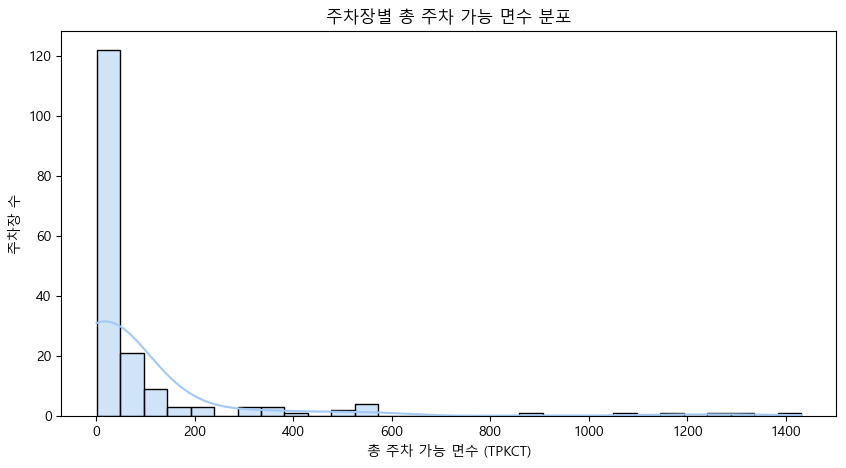

In [138]:
plt.figure(figsize=(10, 5))
sns.histplot(parking_df['TPKCT'], bins=30, kde=True)
plt.title('주차장별 총 주차 가능 면수 분포')
plt.xlabel('총 주차 가능 면수 (TPKCT)')
plt.ylabel('주차장 수')
plt.show()

## 1면 주차장 주소 확인
- 동일 주소에 1면 주차장이 여러 줄 등록된 경우가 있음 (행정적 단위 분리 가능성)

In [ ]:
parking_df[parking_df['TPKCT'] == 1]['ADDR'].value_counts().head(20) # 1대짜리 주차장으로 3줄 등록 = 사실상 3면짜리 주차장
# 노상 주차장은 구획 단위로 나뉘기 때문

ADDR
종로구 관수동 91-4         3
중구 신당동 217-91 0      3
종로구 예지동 140-1        2
종로구 종로5가 458-2       2
종로구 관철동 13-14        2
강남구 신사동 668-0        2
중구 방산동 4-47 0        2
중구 을지로6가 17-442 0    2
중구 남대문로3가 13-3 0     2
중구 남대문로4가 3-6 0      2
중구 남대문로4가 24-1       1
중구 주교동 51-3          1
구로구 구로동 414-13       1
금천구 가산동 691-3        1
영등포구 당산동5가 9-15      1
중구 신당동 222-3         1
종로구 종로2가 38-4        1
중구 을지로7가 2-36        1
영등포구 신길동 812-0       1
중구 을지로3가 282-8       1
Name: count, dtype: int64

In [129]:
parking_df[parking_df['TPKCT'] == 1]['ADDR'].nunique()

87

## 주차장 유형 분포 (노상 vs 노외)
- 노상(NS): 도로변, 대부분 1~2면 규모
- 노외(NW): 부지 내 설치, 규모 다양 (10대 이상 가능)
- 노상은 전부 1면, 노외는 분포가 넓고 다양

In [ ]:
# NS (노상 주차장) : 도로변 → 주차면 1~2개짜리  -> 단기, 회전율 분석에 적합
# NW (노외 주차장) : 건물 지하, 전용 부지 등 → 10대 이상 가능 
parking_df['PKLT_TYPE'].value_counts()

PKLT_TYPE
NS    98
NW    79
Name: count, dtype: int64

In [ ]:
# 노상, 노외에 따라 주차 가능 면수가 어떻게 바뀌는지 확인
# 노상 주차장은 데이터 상으로는 모두 1대만 주차 가능한 걸로 처리됨
print("노상 주차장 TPKCT 분포:")
print(parking_df[parking_df['PKLT_TYPE'] == 'NS']['TPKCT'].value_counts().sort_index())
print("\n노외 주차장 TPKCT 분포:")
print(parking_df[parking_df['PKLT_TYPE'] == 'NW']['TPKCT'].value_counts())

노상 주차장 TPKCT 분포:
TPKCT
1.0    98
Name: count, dtype: int64

노외 주차장 TPKCT 분포:
TPKCT
79.0     3
11.0     3
48.0     2
67.0     2
561.0    2
        ..
123.0    1
132.0    1
104.0    1
26.0     1
1.0      1
Name: count, Length: 69, dtype: int64


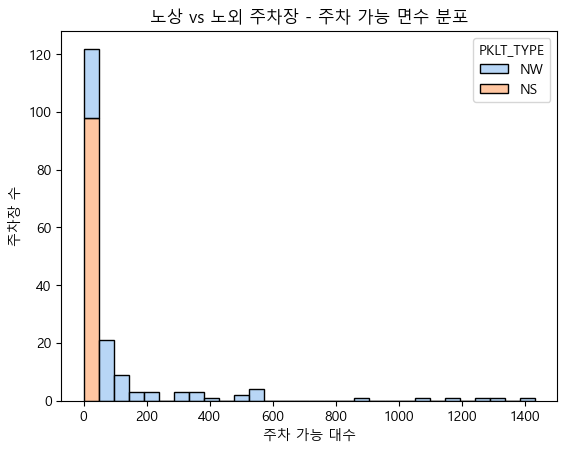

In [139]:
sns.histplot(data=parking_df, x='TPKCT', hue='PKLT_TYPE', bins=30, multiple='stack')
plt.title('노상 vs 노외 주차장 - 주차 가능 면수 분포')
plt.xlabel('주차 가능 대수')
plt.ylabel('주차장 수')
plt.show()

## 실시간 제공 여부에 따른 주차장 유형 분석

### 주차 가능 공간 계산 및 이상치 확인
- 실시간 제공 주차장 중 59개에서 가용 공간이 음수로 나타남 → 데이터 오류 가능
- 음수 데이터의 대부분은 노상 주차장(NS) → 센서 오류 또는 데이터 갱신 지연 가능성

In [195]:
# 실시간 정보 제공 여부별로 유형 분포
# 노상도 절반 이상이 실시간 제공 
cross = pd.crosstab(parking_df['PKLT_TYPE'], parking_df['PRK_STTS_YN'], margins=True)
cross.columns = ['실시간 미제공 (0)', '실시간 제공 (1)', '합계']
cross.index.name = '주차장 유형'
cross

,실시간 미제공 (0),실시간 제공 (1),합계
주차장 유형,,,
NS,40,58,98
NW,23,56,79
All,63,114,177


In [159]:
parking_df["NOW_PRK_VHCL_CNT"].describe()

count     177.000000
mean       64.491525
std       163.060192
min         0.000000
25%         0.000000
50%         6.000000
75%        43.000000
max      1194.000000
Name: NOW_PRK_VHCL_CNT, dtype: float64

In [4]:
# 실시간 주차장 중 주차 가능 공간이 음수인 이상치가 59개나 존재
# 실시간 주차 현황 제공만 필터링
mask = parking_df["PRK_STTS_YN"] == 1

# 주차 가능 공간 계산
parking_df.loc[mask, "available_spaces"] = (
    parking_df.loc[mask, "TPKCT"] - parking_df.loc[mask, "NOW_PRK_VHCL_CNT"]
)

# 이상치 개수
negative_df = parking_df[mask & (parking_df["available_spaces"] < 0)]
print(f"실시간 주차장 중 available_spaces가 음수인 경우: {negative_df.shape[0]}개")

실시간 주차장 중 available_spaces가 음수인 경우: 59개


In [5]:
parking_df['available_spaces'].describe()

count    114.000000
mean      36.000000
std      151.964539
min     -351.000000
25%       -8.000000
50%       -1.000000
75%       31.250000
max      931.000000
Name: available_spaces, dtype: float64

In [ ]:
# 노상 주차장의 실시간 데이터 정확도가 낮을 수 있음
# 노외 주차장 데이터로만 분석

# 실시간 제공 & 여유 공간 음수인 경우 필터링
mask = (parking_df["PRK_STTS_YN"] == 1) & (parking_df["available_spaces"] < 0)
negative_df = parking_df[mask]

# 노상(NS), 노외(NW)별로 개수 확인
negative_counts = negative_df["PKLT_TYPE"].value_counts()
print(negative_counts)

PKLT_TYPE
NS    54
NW     5
Name: count, dtype: int64


## 자치구별 노외 실시간 주차장 분포
- 실시간 데이터가 제공되고, 여유 공간(available_spaces)이 0 이상인 노외 주차장(NW)만 필터링
- 주소에서 `XX구` 형태의 자치구명 추출 후 집계
- 강서구(6개), 중구(5개), 종로구(4개) 순으로 노외 실시간 주차장이 많음
- 그 외 대부분 자치구는 3개 이하 수준

In [6]:
# 노외 주차장 & 실시간 데이터 제공 & 여유 공간이 음수가 아닌 경우 필터링
mask = (parking_df["PRK_STTS_YN"] == 1) & (parking_df["available_spaces"] >= 0) & (parking_df["PKLT_TYPE"] == "NW")
valid_df = parking_df[mask]
valid_df.shape

(51, 43)

C:\Users\jisu\AppData\Local\Temp\ipykernel_10880\2758478199.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["GU"] = valid_df["ADDR"].str.extract(r"([가-힣]+구)")


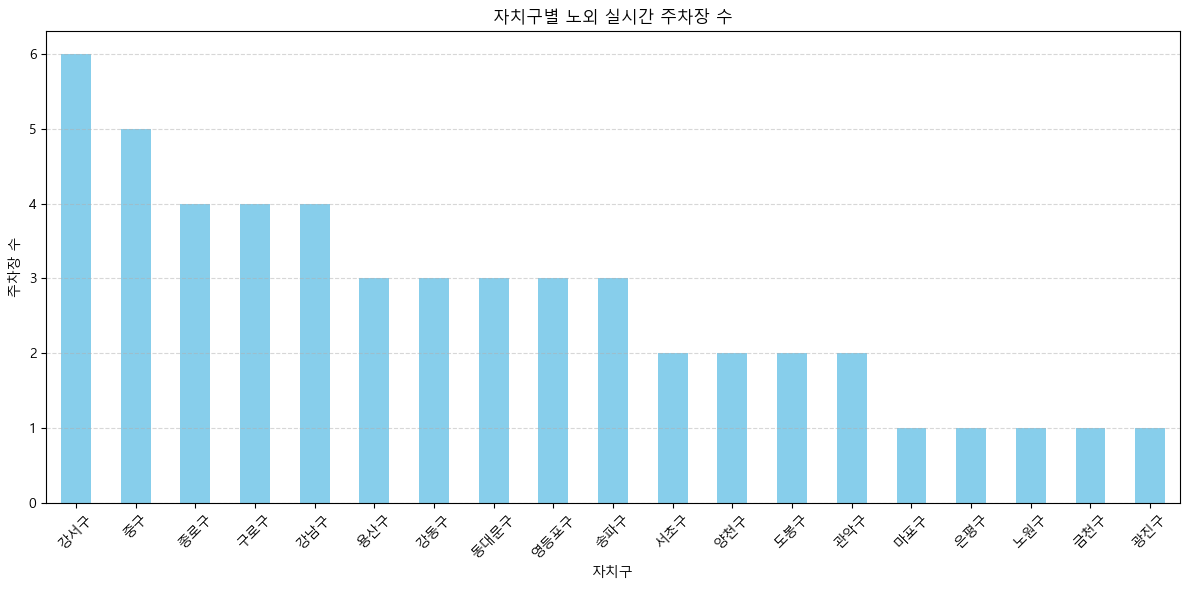

In [7]:
import re

# GU 열 정규식으로 추출: 'XX구' 패턴
valid_df["GU"] = valid_df["ADDR"].str.extract(r"([가-힣]+구)")

# 자치구별 주차장 수 세기
gu_counts = valid_df["GU"].value_counts().sort_values(ascending=False)

# 시각화
plt.figure(figsize=(12, 6))
gu_counts.plot(kind="bar", color="skyblue")
plt.title("자치구별 노외 실시간 주차장 수")
plt.xlabel("자치구")
plt.ylabel("주차장 수")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

## 데이터 업데이트 시간 
- 일부 주차장이 2024년 8월 이후로 한 번도 갱신되지 않았음
- 실시간으로 현황이 업데이트 되지 않는 1개의 주차장은 제거

In [22]:
valid_df['NOW_PRK_VHCL_UPDT_TM'].unique()

array(['2025-06-02 16:56:30', '2025-06-02 16:56:33',
       '2024-08-27 19:02:01', '2025-06-02 16:55:59',
       '2025-06-02 16:56:36', '2025-06-02 16:56:35'], dtype=object)

In [23]:
# 날짜만 추출
valid_df["update_date"] = pd.to_datetime(valid_df["NOW_PRK_VHCL_UPDT_TM"]).dt.date

# 2025-06-02이 아닌 행만 필터링
non_june2 = valid_df[valid_df["update_date"] != pd.to_datetime("2025-06-02").date()]

# 결과 요약
print(f"총 {len(non_june2)}건의 데이터가 2025-06-02이 아닙니다.")
non_june2[["PKLT_NM", "ADDR", "NOW_PRK_VHCL_UPDT_TM"]]

총 1건의 데이터가 2025-06-02이 아닙니다.


C:\Users\jisu\AppData\Local\Temp\ipykernel_10880\2936254649.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["update_date"] = pd.to_datetime(valid_df["NOW_PRK_VHCL_UPDT_TM"]).dt.date


,PKLT_NM,ADDR,NOW_PRK_VHCL_UPDT_TM
26,논현로22길(시),강남구 개포동 1266-0,2024-08-27 19:02:01


In [24]:
# 2025-06-02만 남기고 나머지 제거
valid_df = valid_df[valid_df["update_date"] == pd.to_datetime("2025-06-02").date()].reset_index(drop=True)

In [25]:
valid_df.shape

(50, 48)

## 주차장 가용률 
- 6월 2일 월요일 16:00 기준
- 가용률 0.2~0.3 사이에 가장 많은 주차장들이 몰려 있음
- 0.1 이하 (거의 만차)인 주차장도 다수 존재

In [26]:
# 주차장 가용률 계산
valid_df["available_rate"] = (
    (valid_df["TPKCT"] - valid_df["NOW_PRK_VHCL_CNT"]) / valid_df["TPKCT"]
).round(2)
valid_df["available_rate"].describe()

count    50.000000
mean      0.354200
std       0.211053
min       0.010000
25%       0.202500
50%       0.305000
75%       0.502500
max       0.830000
Name: available_rate, dtype: float64

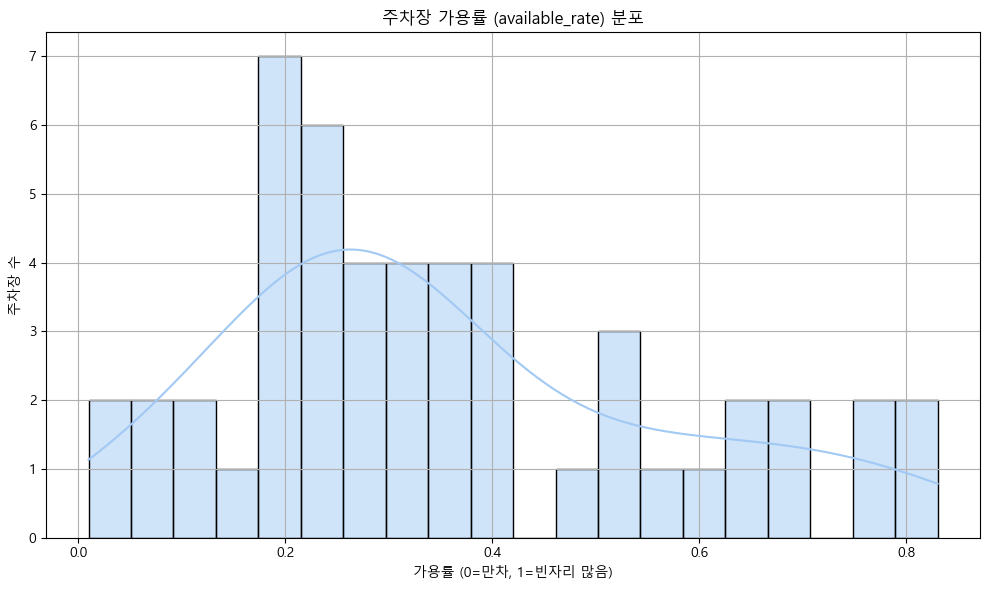

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(valid_df["available_rate"].dropna(), bins=20, kde=True)
plt.title("주차장 가용률 (available_rate) 분포")
plt.xlabel("가용률 (0=만차, 1=빈자리 많음)")
plt.ylabel("주차장 수")
plt.grid(True)
plt.tight_layout()
plt.show()

## 주차장 유료/무료 
- 모든 노외 & 실시간 데이터 제공하는 주차장이 기본적으로 유료 운영
- 주말/공휴일/야간에는 무료로 전환되는 경우가 대부분
- 야간 시간대에는 대부분의 주차장이 운영되지 않음

In [80]:
valid_df['PAY_YN'].value_counts()

PAY_YN
Y    50
Name: count, dtype: int64

In [82]:
print("야간 개방 여부:")
print(valid_df["NGHT_PAY_YN_NM"].value_counts())
print("\n토요일 무료 여부:")
print(valid_df["SAT_CHGD_FREE_NM"].value_counts())
print("\n공휴일 무료 여부:")
print(valid_df["LHLDY_CHGD_FREE_SE_NAME"].value_counts())

야간 개방 여부:
NGHT_PAY_YN_NM
야간 미개방    50
Name: count, dtype: int64

토요일 무료 여부:
SAT_CHGD_FREE_NM
무료    48
유료     2
Name: count, dtype: int64

공휴일 무료 여부:
LHLDY_CHGD_FREE_SE_NAME
무료    45
유료     5
Name: count, dtype: int64


In [84]:
both_free = valid_df[
    (valid_df["SAT_CHGD_FREE_SE"] == "N") &
    (valid_df["LHLDY_CHGD_FREE_SE"] == "N")
]
print("토요일+공휴일 모두 무료 주차장 수:", len(both_free))

토요일+공휴일 모두 무료 주차장 수: 45


In [85]:
fully_paid = valid_df[
    (valid_df["SAT_CHGD_FREE_SE"] == "Y") &
    (valid_df["LHLDY_CHGD_FREE_SE"] == "Y")
]
print("주말/공휴일에도 유료인 주차장 수:", len(fully_paid))

주말/공휴일에도 유료인 주차장 수: 2


In [88]:
fully_paid[["PKLT_NM", "ADDR"]]

,PKLT_NM,ADDR
17,볕우물 공영주차장(시),강동구 암사동 473-3
38,서울글로벌센터 공영주차장(시),종로구 서린동 63-0


In [89]:
target = valid_df[valid_df["PKLT_NM"] == "서울글로벌센터 공영주차장(시)"]

# 관심 열 출력
target[["LHLDY_CHGD_FREE_SE_NAME", "LHLDY_OPER_BGNG_TM", "LHLDY_OPER_END_TM"]]


,LHLDY_CHGD_FREE_SE_NAME,LHLDY_OPER_BGNG_TM,LHLDY_OPER_END_TM
38,유료,0,0


In [ ]:
# 주차장 주소에서 자치구 추출
valid_df["자치구"] = valid_df["ADDR"].str.extract(r"(\S+구)")

# 자치구별 토요일 무료 운영 주차장 수
district_free = valid_df[
    valid_df["SAT_CHGD_FREE_SE"] == "N"
].groupby("자치구").size().sort_values(ascending=False)

print(district_free)

자치구
강서구     6
중구      5
구로구     4
영등포구    3
강남구     3
송파구     3
동대문구    3
종로구     3
용산구     3
강동구     2
도봉구     2
관악구     2
서초구     2
양천구     2
금천구     1
마포구     1
노원구     1
광진구     1
은평구     1
dtype: int64


## 노외 실시간 주차장 위치 시각화

- 실시간 정보를 제공하는 **노외(NW)** 주차장만 필터링 후 지도에 표시
- 각 마커는 주차장의 이름 및 주소 정보를 포함
- 카카오 주소 API를 활용하여 주소 기반 위경도 좌표를 변환 (지오코딩)

In [8]:
import requests
import os
from dotenv import load_dotenv

load_dotenv()

KAKAO_API_KEY = os.getenv("KAKAO_API_KEY")
headers = {"Authorization": f"KakaoAK {KAKAO_API_KEY}"}

def geocode(address):
    url = "https://dapi.kakao.com/v2/local/search/address.json"
    params = {"query": address}
    res = requests.get(url, headers=headers, params=params)
    if res.status_code == 200:
        result = res.json()
        if result['documents']:
            return result['documents'][0]['y'], result['documents'][0]['x']  # 위도, 경도
    return None, None

valid_df['latitude'], valid_df['longitude'] = zip(*valid_df['ADDR'].apply(geocode))

C:\Users\jisu\AppData\Local\Temp\ipykernel_10880\1027523372.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df['latitude'], valid_df['longitude'] = zip(*valid_df['ADDR'].apply(geocode))
C:\Users\jisu\AppData\Local\Temp\ipykernel_10880\1027523372.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df['latitude'], valid_df['longitude'] = zip(*valid_df['ADDR'].apply(geocode))


In [9]:
import folium

# 지도 중심: 서울 시청 근처 좌표
seoul_center = [37.5665, 126.9780]

# 지도 객체 생성
m = folium.Map(location=seoul_center, zoom_start=12)

# 주차장마다 마커 추가
for _, row in valid_df.iterrows():
    if pd.notnull(row["latitude"]) and pd.notnull(row["longitude"]):
        folium.Marker(
            location=[float(row["latitude"]), float(row["longitude"])],
            popup=f"{row['PKLT_NM']}<br>주소: {row['ADDR']}",
            tooltip=row["PKLT_NM"],
            icon=folium.Icon(color="blue", icon="car", prefix="fa")
        ).add_to(m)

# 지도 출력
m

### 관광특구 정보 확인

In [72]:
special_zone_df = pd.read_csv("../data/서울시 관광특구 정보.csv", encoding='cp949')
special_zone_df.head(10)

,키,특구 명칭,관할시군구,주소,행정 시,행정 구,행정 동,지정고시일,면적(㎢),연락처,관련홈페이지,홈페이지 주소,시설현황,위치도
0,BE_IW02-0001,이태원관광특구,서울특별시 용산구,용산구 이태원로 인근,서울특별시,용산구,"이태원1동, 한남동",1997-09-29,0.38,02-2199-7254,용산구_분야별 정보_문화/전통/관광,https://yongsan.go.kr/portal/main/contents.do?...,미술관 세계음식거리 해밀턴호텔 앤티크가구거리 등,http://data.seoul.go.kr/contents/home/yongsan...
1,BE_IW02-0002,명동남대문북창동다동무교동 관광특구,서울특별시 중구,"명동, 회현동, 소공동, 무교동, 다동, 청계천 각 일부 지역",서울특별시,중구,"소공동, 회현동, 명동",2000-03-30 (2012-12-27),0.87,02-3396-4622,중구_문화관광,http://www.junggu.seoul.kr/tour/content.do?cms...,남대문 시장 면세점 한옥마을 N서울타워 명동상가 등,http://data.seoul.go.kr/contents/home/junggu_...
2,BE_IW02-0003,동대문패션타운 관광특구,서울특별시 중구,"중구 을지로 3.4.5, 광희동, 신당 1동 각 일부 지역",서울특별시,중구,"광희동, 신당동",2002-05-23,0.58,02-3396-4622,중구_문화관광,http://www.junggu.seoul.kr/tour/content.do?cms...,동대문 역사문화공원 동대문디자인플라자 청계천 충무아트센터 복합쇼핑몰과 의류도매상가 ...,http://data.seoul.go.kr/contents/home/dft_sts...
3,BE_IW02-0004,종로청계 관광특구,서울특별시 종로구,신문로1가~창신동,서울특별시,종로구,"종로1.2.3.4가동, 종로5.6가동, 창신1동",2006-03-30,0.54,02-2148-1863,종로청계관광특구,http://www.jongno.go.kr/chTownMain.do,고궁 미술관 박물관 창덕궁과 종묘 등 문화 시설 및 세계문화유산 등,http://data.seoul.go.kr/contents/home/jongno_...
4,BE_IW02-0005,잠실관광특구,서울특별시 송파구,롯데월드~석촌호수~방이맛골~올림픽공원,서울특별시,송파구,"잠실3동, 잠실6동, 방이2동, 오륜동",2012-03-15,2.31,02-2147-2116,송파구_문화관광,https://songpa.go.kr/culture/contents.do?key=3...,롯데월드타워 석촌호수 올림픽공원 카페 골목 한성백제문화 박물관 몽촌토성 등,http://data.seoul.go.kr/contents/home/songpa_...
5,BE_IW02-0006,강남마이스 관광특구,서울특별시 강남구,강남구 삼성동 무역센터 일대,서울특별시,강남구,삼성1동,2014-12-18,0.19,02-3423-5535,강남구_분야별_문화관광,https://www.gangnam.go.kr/board/B_000733/10617...,코엑스전시컨벤션센터 아쿠아리움 도심공항터미널 등,http://data.seoul.go.kr/contents/home/gangnam...
6,NaN,홍대 문화예술 관광특구,서울특별시 마포구,마포구 홍대 일대,서울특별시,마포구,"서교동, 동교동, 합정동, 상수동",2021-12-02,1.13,02-3153-8653,NaN,NaN,"홍대 걷고싶은 거리, 홍통거리, 경의선숲길, 공연장 등",NaN


In [74]:
special_zone_df['특구 명칭'].unique()

array(['이태원관광특구', '명동남대문북창동다동무교동 관광특구', '동대문패션타운 관광특구', '종로청계 관광특구',
       '잠실관광특구', '강남마이스 관광특구', '홍대 문화예술 관광특구'], dtype=object)

In [105]:
summary_df['area_name'].unique()

array(['강남 MICE 관광특구', '동대문 관광특구', '명동 관광특구', '이태원 관광특구', '잠실 관광특구',
       '종로·청계 관광특구', '홍대 관광특구', '광화문·덕수궁', '보신각', '가산디지털단지역', '강남역',
       '건대입구역', '고덕역', '고속터미널역', '교대역', '구로디지털단지역', '구로역', '군자역', '대림역',
       '동대문역', '뚝섬역', '미아사거리역', '발산역', '사당역', '서울대입구역', '서울식물원·마곡나루역',
       '서울역', '선릉역', '성신여대입구역', '수유역', '신논현역·논현역', '신도림역', '신림역',
       '신촌·이대역', '양재역', '역삼역', '연신내역', '오목교역·목동운동장', '왕십리역', '용산역',
       '이태원역', '장지역', '장한평역', '천호역', '총신대입구(이수)역', '충정로역', '합정역', '혜화역',
       '홍대입구역(2호선)', '회기역', '가락시장', '가로수길', '광장(전통)시장', '김포공항', '노량진',
       '덕수궁길·정동길', '북촌한옥마을', '서촌', '성수카페거리', '쌍문역', '압구정로데오거리', '여의도',
       '연남동', '영등포 타임스퀘어', '용리단길', '이태원 앤틱가구거리', '인사동', '창동 신경제 중심지',
       '청담동 명품거리', '청량리 제기동 일대 전통시장', '해방촌·경리단길', 'DDP(동대문디자인플라자)',
       'DMC(디지털미디어시티)', '북창동 먹자골목', '남대문시장', '익선동', '신정네거리역', '잠실새내역',
       '잠실역', '잠실롯데타워 일대', '송리단길·호수단길', '신촌 스타광장'], dtype=object)

## 상권 위치 좌표 보정 및 지도 시각화

- 일부 상권 이름이 카카오맵 API에서 인식되지 않아, 검색이 잘 되는 대체 키워드(location_dict)를 수작업으로 매핑
- `area_name`을 `search_keyword`로 변환 후, 카카오맵 키워드 기반 지오코딩 API를 사용해 위도/경도 추출
- 결측값 없이 전 상권에 대해 좌표 확보 완료
- 이후 `folium`을 활용하여 상권 위치를 지도에 시각화

In [10]:
location_dict = {
    '강남 MICE 관광특구': '코엑스',
    '동대문 관광특구': '현대시티아울렛 동대문점', 
    '명동 관광특구': '명동성당',
    '이태원 관광특구': '해밀톤호텔', 
    '잠실 관광특구': '석촌호수', 
    '종로·청계 관광특구': '종각역',
    '홍대 관광특구': '홍대입구역',
    '광화문·덕수궁': '광화문',
    '보신각': '보신각',
    '가산디지털단지역': '가산디지털단지역',
    '강남역': '강남역',
    '건대입구역': '건대입구역',
    '고덕역': '고덕역',
    '고속터미널역': '고속터미널역',
    '교대역': '교대역',
    '구로디지털단지역': '구로디지털단지역',
    '구로역': '구로역',
    '군자역': '군자역',
    '대림역': '대림역',
    '동대문역': '동대문역',
    '뚝섬역': '뚝섬역',
    '미아사거리역': '미아사거리역',
    '발산역': '발산역',
    '사당역': '사당역',
    '서울대입구역': '서울대입구역',
    '서울식물원·마곡나루역': '서울식물원',
    '서울역': '서울역',
    '선릉역': '선릉역',
    '성신여대입구역': '성신여대입구역',
    '수유역': '수유역',
    '신논현역·논현역': '신논현역',
    '신도림역': '신도림역',
    '신림역': '신림역',
    '신촌·이대역': '신촌역',
    '양재역': '양재역',
    '역삼역': '역삼역',
    '연신내역': '연신내역',
    '오목교역·목동운동장': '오목교역',
    '왕십리역': '왕십리역',
    '용산역': '용산역',
    '이태원역': '이태원역',
    '장지역': '장지역',
    '장한평역': '장한평역',
    '천호역': '천호역',
    '총신대입구(이수)역': '총신대입구역',
    '충정로역': '충정로역',
    '합정역': '합정역',
    '혜화역': '혜화역',
    '홍대입구역(2호선)': '홍대입구역 2호선',
    '회기역': '회기역',
    '가락시장': '가락시장',
    '가로수길': '가로수길',
    '광장(전통)시장': '광장시장',
    '김포공항': '김포공항',
    '노량진': '노량진동',
    '덕수궁길·정동길': '덕수궁길',
    '북촌한옥마을': '북촌한옥마을',
    '서촌': '서촌한옥마을',
    '성수카페거리': '성수동카페거리',
    '쌍문역': '쌍문역',
    '압구정로데오거리': '압구정로데오거리',
    '여의도': '여의도',
    '연남동': '연남동',
    '영등포 타임스퀘어': '타임스퀘어',
    '용리단길': '용리단길',
    '이태원 앤틱가구거리': '이태원앤틱가구거리',
    '인사동': '인사동',
    '창동 신경제 중심지': '창동역',
    '청담동 명품거리': '청담동명품거리',
    '청량리 제기동 일대 전통시장': '청량리전통시장',
    '해방촌·경리단길': '경리단길',
    'DDP(동대문디자인플라자)': '동대문디자인플라자',
    'DMC(디지털미디어시티)': '디지털미디어시티역',
    '북창동 먹자골목': '북창동먹자골목',
    '남대문시장': '남대문시장',
    '익선동': '서울 종로구 익선동',
    '신정네거리역': '신정네거리역',
    '잠실새내역': '잠실새내역',
    '잠실역': '잠실역',
    '잠실롯데타워 일대': '롯데월드타워',
    '송리단길·호수단길': '송리단길',
    '신촌 스타광장': '스타광장'
}


In [14]:
from dotenv import load_dotenv
import os

load_dotenv()
KAKAO_API_KEY = os.getenv("KAKAO_API_KEY")
headers = {"Authorization": f"KakaoAK {KAKAO_API_KEY}"}

def geocode_keyword(keyword):
    url = "https://dapi.kakao.com/v2/local/search/keyword.json"
    params = {"query": keyword, "size": 1}
    res = requests.get(url, headers=headers, params=params)
    if res.status_code == 200:
        result = res.json()
        if result["documents"]:
            doc = result["documents"][0]
            return float(doc["y"]), float(doc["x"])
    return None, None

summary_df["search_keyword"] = summary_df["area_name"].map(location_dict)

lat_lng = summary_df["search_keyword"].apply(lambda x: geocode_keyword(x) if pd.notnull(x) else (None, None))
summary_df["latitude"], summary_df["longitude"] = zip(*lat_lng)


In [15]:
summary_df[["latitude", "longitude"]].isnull().sum()

latitude     0
longitude    0
dtype: int64

In [65]:
# summary_df의 search_keyword를 기준으로 dict 생성
area_to_keyword = summary_df.set_index("area_name")["search_keyword"].to_dict()

# categories_df에 매핑
categories_df["search_keyword"] = categories_df["area_name"].map(area_to_keyword)

# 위도/경도도 같이 붙이기 위해 DataFrame에서 가져오기
lat_lon_dict = summary_df.set_index("area_name")[["latitude", "longitude"]].to_dict(orient="index")

# 각각 열로 분리하여 할당
categories_df["latitude"] = categories_df["area_name"].map(lambda x: lat_lon_dict[x]["latitude"])
categories_df["longitude"] = categories_df["area_name"].map(lambda x: lat_lon_dict[x]["longitude"])

In [16]:
import folium

# 1. 중심 좌표 (서울 중심)
seoul_center = [37.5665, 126.9780]
m = folium.Map(location=seoul_center, zoom_start=12)

# 2. summary_df의 각 행에 마커 추가
for _, row in summary_df.iterrows():
    if pd.notnull(row['latitude']) and pd.notnull(row['longitude']):
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            popup=row['area_name'],  # 마커 클릭 시 표시될 텍스트
            tooltip=row['area_name']  # 마우스 올릴 때 표시될 텍스트
        ).add_to(m)

# 3. 지도 출력 (Jupyter에서는 바로 출력됨)
m

## 상권과 주차장 동시에 표시

In [ ]:
import folium

# 서울 중심 좌표
seoul_center = [37.5665, 126.9780]
m = folium.Map(location=seoul_center, zoom_start=12)

# 주차장 마커 (파란색, 자동차 아이콘) : 50개
for _, row in valid_df.iterrows():
    if pd.notnull(row["latitude"]) and pd.notnull(row["longitude"]):
        folium.Marker(
            location=[float(row["latitude"]), float(row["longitude"])],
            popup=f"{row['PKLT_NM']}<br>주소: {row['ADDR']}",
            tooltip=row["PKLT_NM"],
            icon=folium.Icon(color="blue", icon="car", prefix="fa")
        ).add_to(m)

# 상권 마커 (빨간색, 기본 아이콘) : 82개
for _, row in summary_df.iterrows():
    if pd.notnull(row['latitude']) and pd.notnull(row['longitude']):
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            popup=row['area_name'],
            tooltip=row['area_name'],
            icon=folium.Icon(color="red")
        ).add_to(m)

# 지도 출력
m


## 상권 정보 df 

### payment_count (결제 건수)
- 평균 72건, 최대 554건, 최소 4건

- 25% 이하 상권은 31건 미만, 75% 이상은 86건 초과

- 상권 간 결제량 편차가 큼, 일부 상권에 소비 쏠림 존재

### min_amount (최소 결제 금액)
- 평균 약 192만 원, 중앙값 95만 원

- 0원도 존재 → 무료 결제 혹은 비정상 데이터

- 75% 이상 상권은 최소 결제 2,275,000원 이상

- 일부 상권에서 소비 시작 금액 자체가 매우 높음, 반면 저소득 또는 비활성 상권도 존재

### max_amount (최대 결제 금액)
- 평균 약 201만 원, 중앙값 100만 원, 최대 1,600만 원

- 초고액 소비가 특정 상권에 존재 (예: 명동, 롯데타워, 강남MICE 등일 가능성)

- 상권에 따라 소비력 격차가 큼


In [29]:
summary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       82 non-null     datetime64[ns]
 1   area_name       82 non-null     object        
 2   activity_level  82 non-null     object        
 3   payment_count   82 non-null     object        
 4   min_amount      82 non-null     int64         
 5   max_amount      82 non-null     int64         
 6   search_keyword  82 non-null     object        
 7   latitude        82 non-null     float64       
 8   longitude       82 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.9+ KB


In [33]:
summary_df["payment_count"] = pd.to_numeric(summary_df["payment_count"], errors="coerce")

In [40]:
# 결제 건수, 최소/최대 금액 분포
summary_df[["payment_count", "min_amount", "max_amount"]].describe()

,payment_count,min_amount,max_amount
count,82,82,82
mean,72,"1,923,902","2,017,317"
std,78,"2,658,349","2,785,018"
min,4,0,"10,000"
25%,31,"500,000","550,000"
50%,52,"950,000","1,000,000"
75%,86,"2,275,000","2,375,000"
max,554,"15,000,000","16,000,000"


In [41]:
summary_df['min_amount'].unique()

array([  500000,   450000,  7500000,   100000,  2400000,  6200000,
        4500000,  1500000,  1200000,   950000, 15000000,  3200000,
         700000,  3300000,   750000,   600000,   350000,   250000,
         650000,  2300000,  3100000,  1100000,  1400000,  2100000,
          40000,  2600000,  5700000,  2500000,  1900000,  5300000,
        1300000,  5000000,    50000,  1800000,  2000000,    60000,
         900000,    20000,   300000,  2200000,  4900000,  6100000,
        2700000,   800000,        0,   550000,  1600000])

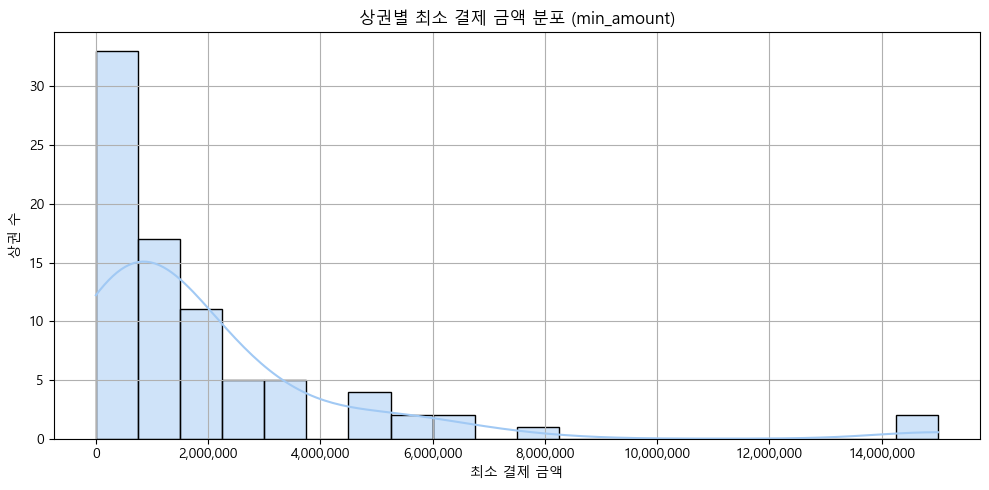

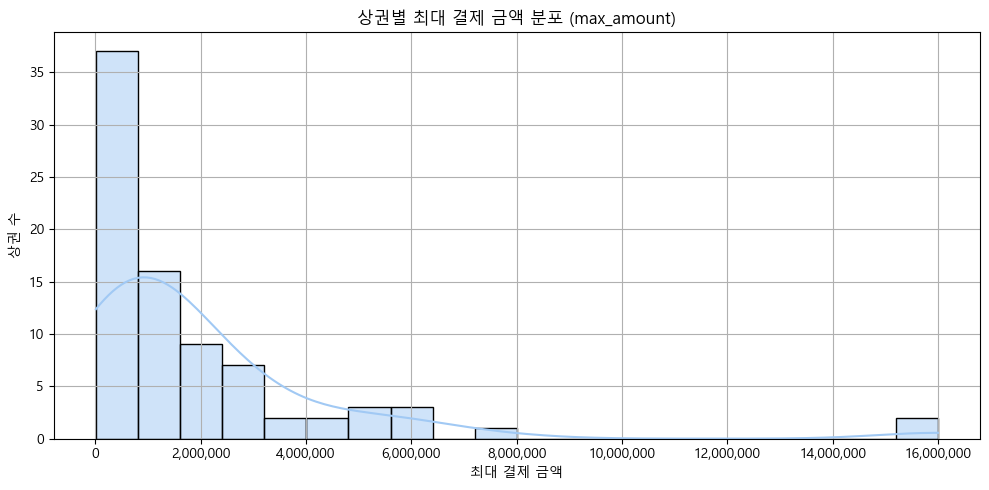

In [43]:
import matplotlib.ticker as mticker

# 최소 결제 금액 시각화
plt.figure(figsize=(10, 5))
sns.histplot(summary_df["min_amount"], bins=20, kde=True)
plt.title("상권별 최소 결제 금액 분포 (min_amount)")
plt.xlabel("최소 결제 금액")
plt.ylabel("상권 수")
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))  # <- 여기가 핵심
plt.tight_layout()
plt.show()

# 최대 결제 금액 시각화
plt.figure(figsize=(10, 5))
sns.histplot(summary_df["max_amount"], bins=20, kde=True)
plt.title("상권별 최대 결제 금액 분포 (max_amount)")
plt.xlabel("최대 결제 금액")
plt.ylabel("상권 수")
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))  # <- 여기도
plt.tight_layout()
plt.show()

### 지역별 최대 결제 금액 평균
- 일부 지역(상위 5곳 등)에서는 **최대 결제 금액이 평균적으로 1,000만 원 이상**으로 매우 높게 나타남
- 반면 다수의 상권은 **200만 원 이하 수준**으로 분포, **상권 간 소비력 차이가 큼**을 시사

In [49]:
summary_df.groupby("search_keyword")[["payment_count", "min_amount", "max_amount"]].mean().sort_values(by="payment_count", ascending=False)

,payment_count,min_amount,max_amount
search_keyword,,,
명동성당,554,"7,500,000","7,600,000"
강남역,274,"15,000,000","16,000,000"
홍대입구역,264,"4,500,000","4,600,000"
여의도,208,"4,900,000","5,000,000"
창동역,193,"6,100,000","6,200,000"
종각역,190,"6,200,000","6,300,000"
신촌역,167,"5,700,000","5,800,000"
석촌호수,163,"2,400,000","2,500,000"
오목교역,158,"5,300,000","5,400,000"


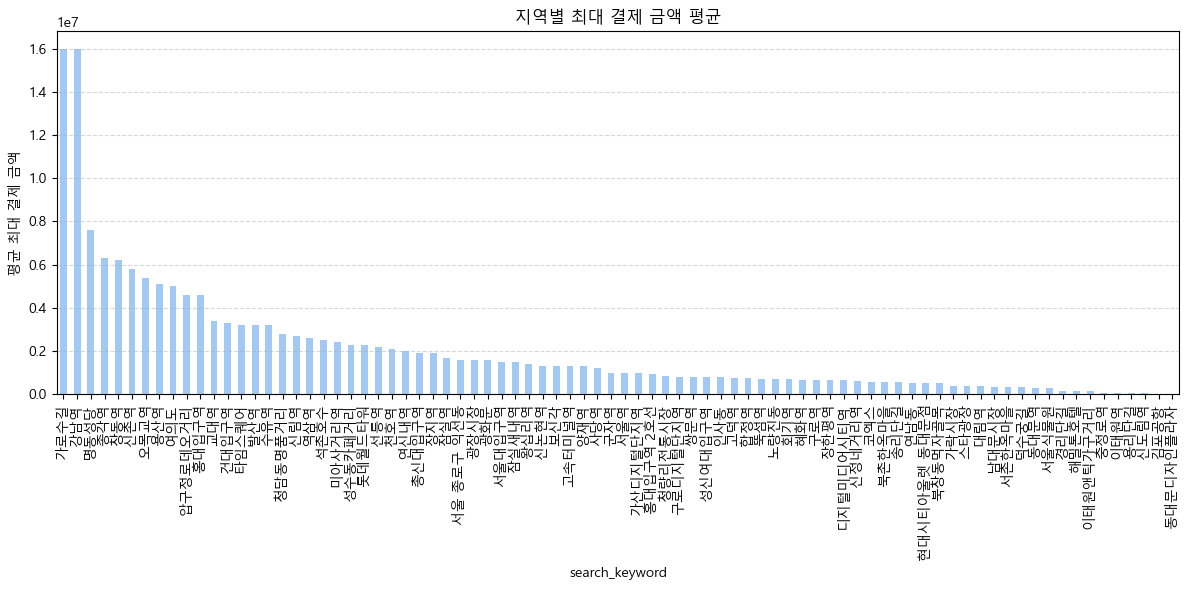

In [ ]:
avg_by_keyword = summary_df.groupby("search_keyword")[["payment_count", "min_amount", "max_amount"]].mean().sort_values(by="max_amount", ascending=False)

# 시각화
plt.figure(figsize=(12, 6))
avg_by_keyword["max_amount"].plot(kind="bar")
plt.title("지역별 최대 결제 금액 평균")
plt.ylabel("평균 최대 결제 금액")
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

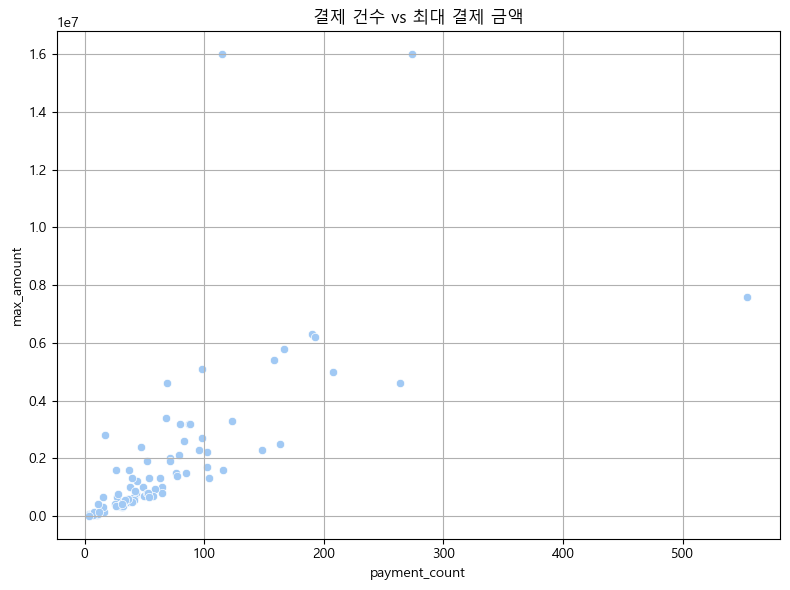

In [ ]:
# 결제 건수가 많을수록 최대 결제 금액도 증가하는 양의 상관관계가 있음
# 극단 값도 존재
plt.figure(figsize=(8, 6))
sns.scatterplot(data=summary_df, x="payment_count", y="max_amount")
plt.title("결제 건수 vs 최대 결제 금액")
plt.xlabel("payment_count")
plt.ylabel("max_amount")
plt.grid(True)
plt.tight_layout()
plt.show()

## 업종별 상세 소비 df
- 제과/커피/패스트푸드, 편의점, 슈퍼마켓, 병원, 약국 순으로 결제 건수가 높음
- '한산한'이 249건으로 압도적으로 많음 → 전반적으로 소비 저조
- '분주한', '바쁜'이 상대적으로 적음

### 업종별 활성도
- 제과/커피/패스트푸드, 편의점, 할인점/슈퍼마켓 등 **소액 소비 업종**들은 비교적 `보통`, `분주한`, `바쁜` 등 **활동적인 분포**를 보임
- 반면 기타요식, 한식, 일식/중식/양식 등 **식음료 업종**들은 대부분 `한산한`으로 분포되어 있음
- 병원, 약국도 일정 수준 이상의 `보통/분주한` 수준을 보이지만 `한산한` 비율도 존재
- 의복/의류, 패션/잡화, 미용서비스, 유흥 등은 전체 데이터 수 자체가 적고 `한산한` 중심으로 분포됨
- **빈도 중심 업종**은 상대적으로 활성도가 높음  


In [44]:
categories_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   timestamp      475 non-null    object
 1   area_name      475 non-null    object
 2   category       475 non-null    object
 3   level          475 non-null    object
 4   payment_count  475 non-null    int64 
 5   amount_min     475 non-null    int64 
 6   amount_max     475 non-null    int64 
 7   stores         475 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 29.8+ KB


In [46]:
# 업종 종류
categories_df["category"].unique()

array(['제과/커피/패스트푸드', '기타요식', '할인점/슈퍼마켓', '편의점', '병원', '한식', '일식/중식/양식',
       '의복/의류', '패션/잡화', '스포츠/문화/레저', '약국', '유흥', '미용서비스'], dtype=object)

In [47]:
# 업종별 결제 건수 평균
categories_df.groupby("category")["payment_count"].mean().sort_values(ascending=False)

category
제과/커피/패스트푸드   19
편의점           15
할인점/슈퍼마켓      14
병원            12
기타요식          11
약국            11
스포츠/문화/레저     10
한식             8
의복/의류          8
일식/중식/양식       7
패션/잡화          6
미용서비스          4
유흥             4
Name: payment_count, dtype: float64

In [48]:
# 지역별 업종 활성도 수준 분포
categories_df["level"].value_counts()

level
한산한    249
보통      85
바쁜      76
분주한     65
Name: count, dtype: int64

In [ ]:
# 업종별 활성도 수준 분포
categories_df.groupby("category")["level"].value_counts()

category     level
기타요식         한산한      45
             보통       10
             바쁜        5
미용서비스        한산한       3
병원           한산한      28
             보통       14
             바쁜       10
             분주한      10
스포츠/문화/레저    한산한      14
             보통        5
             분주한       3
             바쁜        2
약국           한산한      21
             분주한      18
             바쁜       10
             보통        8
유흥           한산한       1
의복/의류        한산한       8
             보통        1
일식/중식/양식     한산한      18
제과/커피/패스트푸드  한산한      26
             보통       21
             바쁜       14
             분주한       6
패션/잡화        한산한       2
             보통        1
편의점          한산한      25
             바쁜       20
             보통       13
             분주한      11
한식           한산한      41
             보통        5
             바쁜        1
할인점/슈퍼마켓     분주한      17
             한산한      17
             바쁜       14
             보통        7
Name: count, dtype: int64

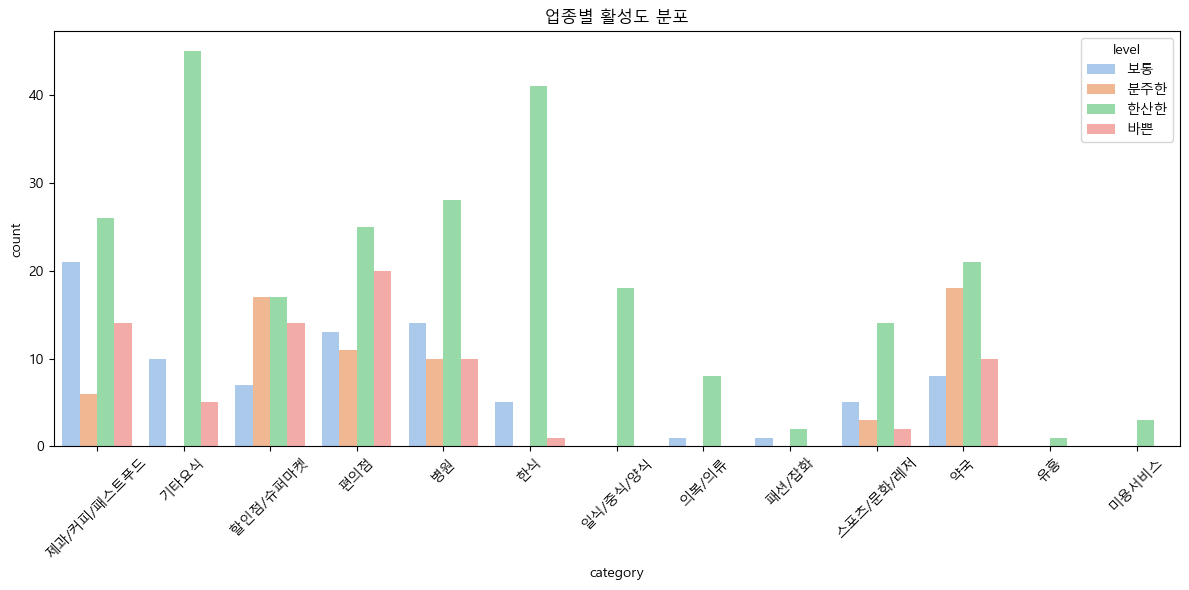

In [62]:
plt.figure(figsize=(12, 6))
sns.countplot(data=categories_df, x="category", hue="level")
plt.title("업종별 활성도 분포")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 상위 상권 10개 지역의 업종별 결제 건수 평균
top_areas = summary_df.sort_values("payment_count", ascending=False)["area_name"].head(10)
categories_df[categories_df["area_name"].isin(top_areas)].groupby("category")["payment_count"].mean().sort_values(ascending=False)

category
제과/커피/패스트푸드   66
편의점           35
병원            27
약국            23
할인점/슈퍼마켓      23
기타요식          19
스포츠/문화/레저     15
한식            14
의복/의류          9
일식/중식/양식       7
패션/잡화          6
미용서비스          4
유흥             4
Name: payment_count, dtype: float64

In [ ]:
# 업종별 최소, 최대 결제 금액 평균
categories_df.groupby("category")[["amount_min", "amount_max"]].mean().sort_values("amount_max", ascending=False)

,amount_min,amount_max
category,,
병원,"1,204,516","1,295,323"
할인점/슈퍼마켓,"355,091","402,000"
미용서비스,"350,000","400,000"
의복/의류,"350,000","400,000"
패션/잡화,"316,667","366,667"
약국,"276,667","318,421"
스포츠/문화/레저,"211,667","249,167"
한식,"151,489","187,872"
일식/중식/양식,"142,222","174,444"


## 상권 요약 정보 & 업종별 상세 소비 정보 조인

### search_keyword 기준 업종별 결제 금액 비교 
- 강남역은 고가 의료 소비 중심지
  - 병원(1,200만), 약국(1,200만) 수준 → 성형외과, 피부과 등 고액 진료 가능성

- 홍대입구는 유행/트렌드 업종 강세
  - 패션/잡화(500만), 제과, 일식 등 → MZ세대 대상 소비 활발

- 여의도는 오피스 기반 소비
  - 병원, 약국, 편의점, 한식 등 실용적 소비 중심

- 창동역은 문화/스포츠 지출 눈에 띔

  - 문화시설 또는 체육시설 관련 소비 예상됨

- 명동성당은 다양한 업종에서 균형

  - 외국인 관광지로 다양한 소비 발생 가능성

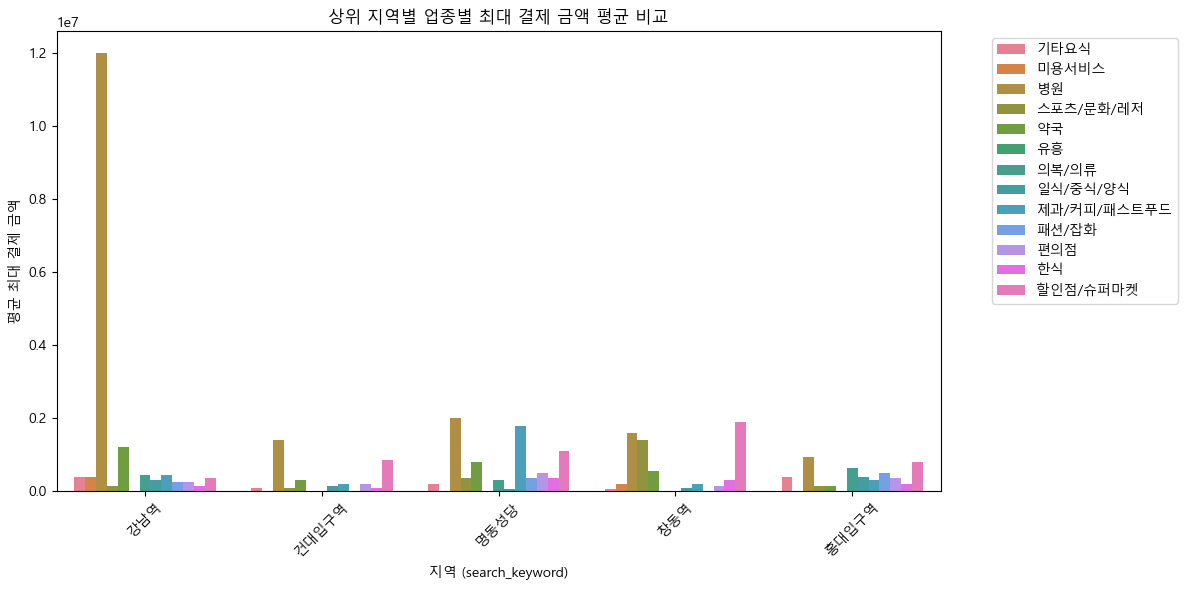

In [ ]:
# search_keyword 기준 업종별 결제 금액 비교 (평균)
pivot_df = categories_df.groupby(["search_keyword", "category"])[
    ["payment_count", "amount_min", "amount_max"]
].mean().reset_index()

# 상위 5개 지역에 대해 시각화
top_keywords = categories_df["search_keyword"].value_counts().head(5).index.tolist()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=pivot_df[pivot_df["search_keyword"].isin(top_keywords)],
    x="search_keyword", y="amount_max", hue="category"
)
plt.title("상위 지역별 업종별 최대 결제 금액 평균 비교")
plt.ylabel("평균 최대 결제 금액")
plt.xlabel("지역 (search_keyword)")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# 상위 5개 지역(search_keyword)에 대해 업종별 평균 최대 결제 금액을 비교
top5_keywords = summary_df.sort_values("payment_count", ascending=False).head(5)["search_keyword"]

# 업종별 최대 결제 금액 평균 계산
pivot_df = categories_df[categories_df["search_keyword"].isin(top5_keywords)].groupby(
    ["search_keyword", "category"]
)["amount_max"].mean().unstack().fillna(0).astype(int)

pivot_df

category,기타요식,미용서비스,병원,스포츠/문화/레저,약국,유흥,의복/의류,일식/중식/양식,제과/커피/패스트푸드,패션/잡화,편의점,한식,할인점/슈퍼마켓
search_keyword,,,,,,,,,,,,,
강남역,400000,400000,12000000,150000,1200000,20000,450000,300000,450000,250000,250000,150000,350000
명동성당,200000,0,2000000,350000,800000,0,300000,70000,1800000,350000,500000,350000,1100000
여의도,500000,0,2300000,0,350000,0,0,200000,350000,0,450000,400000,700000
창동역,70000,200000,1600000,1400000,550000,0,0,90000,200000,0,150000,300000,1900000
홍대입구역,400000,0,950000,150000,150000,0,650000,400000,300000,500000,350000,200000,800000


## 상권 중심을 기준으로 반경 300m 내에 주차장이 얼마나 분포해 있는가

In [77]:
from geopy.distance import geodesic

def count_parking_lots_within_radius(area_lat, area_lon, parking_df, radius_m=300):
    count = 0
    for _, park_row in parking_df.iterrows():
        if pd.notnull(park_row["latitude"]) and pd.notnull(park_row["longitude"]):
            park_coord = (float(park_row["latitude"]), float(park_row["longitude"]))
            area_coord = (area_lat, area_lon)
            distance = geodesic(area_coord, park_coord).meters
            if distance <= radius_m:
                count += 1
    return count

# 상권별 주차장 수 컬럼 추가
summary_df["주차장_300m내_개수"] = summary_df.apply(
    lambda row: count_parking_lots_within_radius(row["latitude"], row["longitude"], valid_df, 300),
    axis=1
)

summary_df[["area_name", "주차장_300m내_개수"]].sort_values(by="주차장_300m내_개수", ascending=False).head(10)

,area_name,주차장_300m내_개수
15,구로디지털단지역,2
8,보신각,2
13,고속터미널역,1
12,고덕역,1
7,광화문·덕수궁,1
5,종로·청계 관광특구,1
79,잠실롯데타워 일대,1
43,천호역,1
23,사당역,1
18,대림역,1
